<a href="https://colab.research.google.com/github/ahsanul-islam/audi_used_car_analysis/blob/main/audi_used_car_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data sets

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Data sets/EMK_WORKSHOP/audi.csv')
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


## Information about the dataset

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   mpg           10668 non-null  float64
 7   engineSize    10668 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 666.9+ KB
None


## Insights about the data

From the dataset it is observed that there are 8 columns. There are 4 categorical data.These are 'model', 'year', 'transmission', 'fuelType'. The other ones are numerical data. So there can be 3 barplot each for the categorical data.

## Function for counting unique values

In [4]:
def Unique_value_counts(data,col_names):
  dic = dict()
  for j in col_names:
    dic[j]=list()
  for i in col_names:
    dic[i].append(len(data[i].unique()))
  return dic
u_v = Unique_value_counts(df,['model','year','transmission','fuelType'])

## Data Frame of Unique Values

In [5]:
unique_values_dataframe=pd.DataFrame.from_dict(u_v,orient='columns')
display(unique_values_dataframe)

,model,year,transmission,fuelType
0,26,21,3,3


## Function for value counting for each category

In [6]:
def value_counts_in_percentage(df,col_name):
  count_val = pd.DataFrame(df[col_name].value_counts())
  count_val=count_val.reset_index()
  count_val=count_val.rename(columns={'index': col_name,col_name:'Percentage (%) of Cars'})
  count_val['Percentage (%) of Cars']=np.round(count_val['Percentage (%) of Cars']/count_val['Percentage (%) of Cars'].sum(),4)*100
  return count_val

## Function for Barplot

In [7]:
def bar_plot(data,color,y_ticks):
  columns = list(data.columns)
  if len(data)>10:
    rotate = 90
  else:
    rotate = 0

  sns.barplot(x = columns[0],y=columns[1],data=data,color=color,alpha=1)
  plt.title('Percantage (%) of Present Cars for each {}'.format(columns[0].title()))
  plt.xticks(rotation=rotate)
  plt.yticks(y_ticks)
  plt.xlabel(columns[0].title())
  plt.ylabel('Percentage (%) of Cars ')
  


## Barplots Show

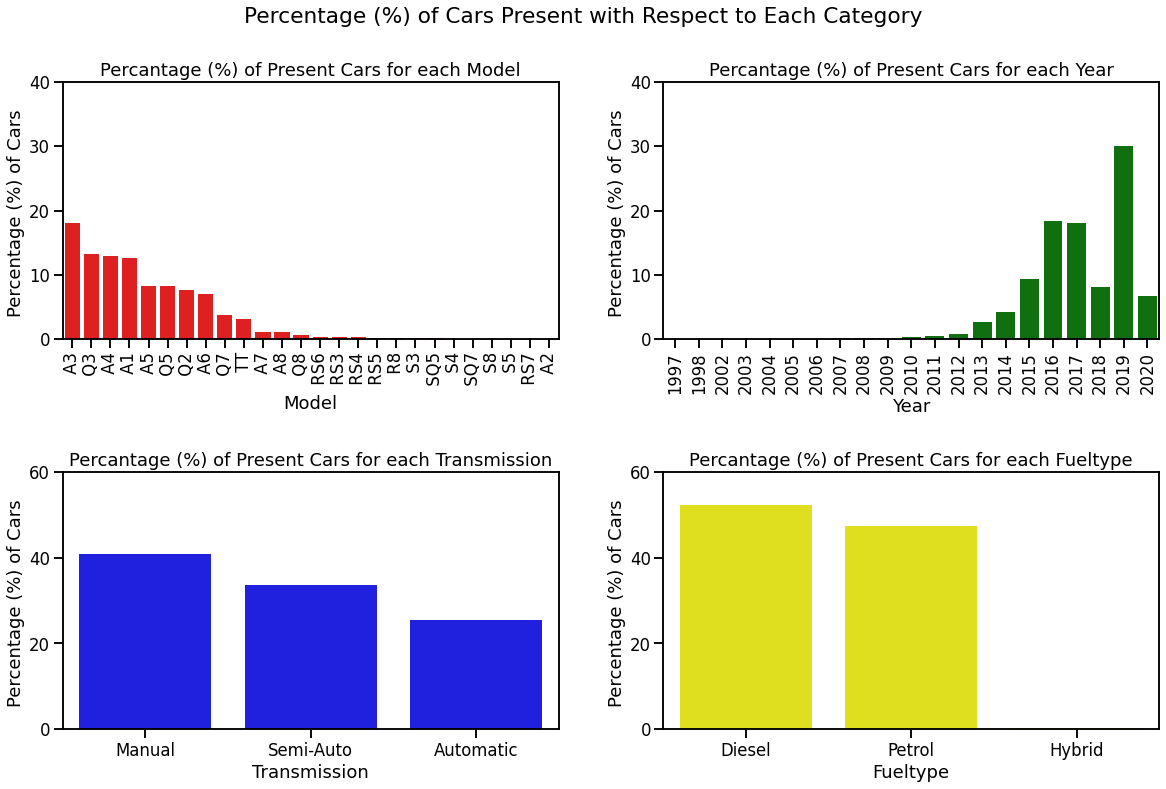

In [8]:
sns.set_context('talk')
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
bar_plot(value_counts_in_percentage(df,'model'),'red',np.arange(0,41,10))
plt.subplot(2,2,2)
bar_plot(value_counts_in_percentage(df,'year'),'green',np.arange(0,41,10))
plt.subplot(2,2,3)
bar_plot(value_counts_in_percentage(df,'transmission'),'blue',np.arange(0,61,20))
plt.subplot(2,2,4)
bar_plot(value_counts_in_percentage(df,'fuelType'),'yellow',np.arange(0,61,20))
plt.suptitle('Percentage (%) of Cars Present with Respect to Each Category')

plt.tight_layout(pad=4, w_pad=2, h_pad=2)
plt.show()